# (Machine Learning (Unsupervised Learning Model))


## I will use my MapMyRun dataset for this analysis. In order to add classification, I will have to use the pandas feature of categorizing sets into bins. Here we go!

In [91]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

In [92]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from color_palette import Color, mix, presets
my_rgb = Color((255, 0, 0))  # You can either call on rbg
sns.set_palette(sns.color_palette("Paired"))

## Part 1

In this section, we will:

*   Import the data and check the data types.
*   Drop the channel and region columns as they won't be used since we focus on numeric columns for this example.
*   Convert the remaining columns to floats if necessary.
*   Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.


In [93]:
data = pd.read_csv(r"https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv")

In [94]:
data.shape

(693, 15)

In [95]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"June 24, 2022","June 24, 2022",Run,400,3.10000,1554,8.35484,0.0000,7.18147,0.0000,NaN,4192.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6669369046
1,"June 23, 2022","June 23, 2022",Run,410,3.10000,1748,9.39785,0.0000,6.38444,0.0000,NaN,4656.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6666750427
2,"June 21, 2022","June 22, 2022",Run,403,3.10000,1665,8.95161,0.0000,6.70270,0.0000,NaN,4458.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6663099454
3,"June 19, 2022","June 19, 2022",Run,378,2.66000,1800,11.27820,0.0000,5.32000,0.0000,NaN,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994
4,"June 18, 2022","June 18, 2022",Run,370,2.57857,1698,10.96610,1.1124,5.47140,53.9375,159.0,4431.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6655598125


In [96]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace                    0
Avg Speed (mi/h)            0
Max Speed                   0
Avg Heart Rate            238
Steps                      24
Notes                       0
Source                      0
Link                        0
dtype: int64

In [97]:
meanhrdf = data
meanhrdf.dropna


<bound method DataFrame.dropna of      Date Submitted    Workout Date     Activity Type  Calories Burned (kCal)  \
0     June 24, 2022   June 24, 2022               Run                     400   
1     June 23, 2022   June 23, 2022               Run                     410   
2     June 21, 2022   June 22, 2022               Run                     403   
3     June 19, 2022   June 19, 2022               Run                     378   
4     June 18, 2022   June 18, 2022               Run                     370   
..              ...             ...               ...                     ...   
688    May 13, 2019    May 13, 2019  Indoor Run / Jog                     191   
689   Oct. 19, 2016   Oct. 19, 2016     Class Workout                     186   
690   Oct. 12, 2016   Oct. 12, 2016     Class Workout                     183   
691  Sept. 26, 2016  Sept. 26, 2016     Class Workout                     186   
692   Aug. 12, 2016   Aug. 12, 2016     Class Workout                     1

In [98]:
df = data[~(data == 0).any(axis=1)]


In [99]:
df.shape

(346, 15)

In [100]:
mean_HR = df['Avg Heart Rate'].mean()
mean_max_pace = df['Max Pace'].mean()
mean_max_speed = df['Max Speed'].mean()

In [101]:
#data['Avg Heart Rate'].fillna(method='ffill', inplace=True)
#data['Avg Heart Rate'].astype(int).round(0)
data['Avg Heart Rate'] = data['Avg Heart Rate'].fillna(mean_HR).round(0)
data['Max Pace'] = data['Max Pace'].fillna(mean_max_pace).round(0)
data['Max Speed'] = data['Max Speed'].fillna(mean_max_speed).round(0)
data.isnull().sum()
#data.head(4)
#after filling the missing values I will drop the missing values

Date Submitted             0
Workout Date               0
Activity Type              0
Calories Burned (kCal)     0
Distance (mi)              0
Workout Time (seconds)     0
Avg Pace (min/mi)          0
Max Pace                   0
Avg Speed (mi/h)           0
Max Speed                  0
Avg Heart Rate             0
Steps                     24
Notes                      0
Source                     0
Link                       0
dtype: int64

In [102]:
data.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"June 24, 2022","June 24, 2022",Run,400,3.1,1554,8.35484,0.0,7.18147,0.0,141.0,4192.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6669369046


In [103]:
data['Avg Heart Rate'].replace(to_replace = 0, value = mean_HR, inplace=True)
data['Max Pace'].replace(to_replace = 0, value = mean_max_pace, inplace=True)
data['Max Speed'].replace(to_replace = 0, value = mean_max_speed, inplace=True)

In [104]:
data.head(10)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"June 24, 2022","June 24, 2022",Run,400,3.10000,1554,8.35484,3.199494,7.18147,74.598316,141.000000,4192.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6669369046
1,"June 23, 2022","June 23, 2022",Run,410,3.10000,1748,9.39785,3.199494,6.38444,74.598316,141.000000,4656.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6666750427
2,"June 21, 2022","June 22, 2022",Run,403,3.10000,1665,8.95161,3.199494,6.70270,74.598316,141.000000,4458.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6663099454
3,"June 19, 2022","June 19, 2022",Run,378,2.66000,1800,11.27820,3.199494,5.32000,74.598316,141.000000,4713.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6658125994
4,"June 18, 2022","June 18, 2022",Run,370,2.57857,1698,10.96610,1.000000,5.47140,54.000000,159.000000,4431.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6655598125
5,"June 16, 2022","June 17, 2022",Run,315,2.33000,1391,9.94993,3.199494,6.03019,74.598316,141.000000,3684.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6652076194
6,"June 15, 2022","June 15, 2022",Run,405,3.10000,1691,9.09140,3.199494,6.59965,74.598316,141.000000,4520.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6649778854
7,"June 12, 2022","June 12, 2022",Run,428,3.09762,1955,10.51630,3.000000,5.70545,20.000000,141.375367,5052.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6641879077
8,"June 10, 2022","June 10, 2022",Run,881,6.20257,4182,11.23370,1.000000,5.34108,100.000000,153.000000,10479.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6636951754
9,"June 9, 2022","June 8, 2022",Run,407,3.11000,1702,9.12111,3.199494,6.57814,74.598316,153.000000,4548.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6634375492


In [105]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()

Date Submitted            0
Workout Date              0
Activity Type             0
Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace                  0
Avg Speed (mi/h)          0
Max Speed                 0
Avg Heart Rate            0
Steps                     0
Notes                     0
Source                    0
Link                      0
dtype: int64

In [106]:
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace', 'Avg Speed (mi/h)', 'Max Speed',
       'Avg Heart Rate', 'Steps', 'Notes', 'Source', 'Link'],
      dtype='object')

In [107]:
data = data.drop(['Date Submitted', 'Workout Date', 'Activity Type','Notes', 'Source', 'Link'], axis=1)

In [108]:
data['Duration'] = data['Workout Time (seconds)'].astype(int) / 60

In [109]:
data = data[data['Duration'] < 1000]

In [110]:
data.dtypes

Calories Burned (kCal)      int64
Distance (mi)             float64
Workout Time (seconds)      int64
Avg Pace (min/mi)         float64
Max Pace                  float64
Avg Speed (mi/h)          float64
Max Speed                 float64
Avg Heart Rate            float64
Steps                     float64
Duration                  float64
dtype: object

In [111]:
# Convert to floats
for col in data.columns:
    data[col] = data[col].astype(np.float)

Preserve the original data.


In [112]:
data_orig = data.copy()

## Brief Description of my Dataset:

Date Submitted: The date the workout was submitted - this could be different than the workout date if the workout was near midnight or if it was manually submitted on a different date.

Workout Date: The date of the workout.

Activity Type: The type of workout (primarily Running or Walking)

Calories Burned (kCal): The number of calories burned during the workout

Distance (mi): The number of miles run in the iteration

Workout Time (seconds): The number of seconds the workout lasted. I will later turn this into minutes

Avg Pace (min/mi): Average pace of the activity

Max Pace: Max pace achieved during the workout

Avg Speed (mi/h): The miles per hour measurement of the activity

Max Speed: The max speed captured during the activity

Avg Heart Rate: Average Heart Rate during the activity

Steps: The number of steps captured

Notes: Any notes captured

Source: Where the data came from

Link: Link to the specific workout on MapMyRun

## EDA

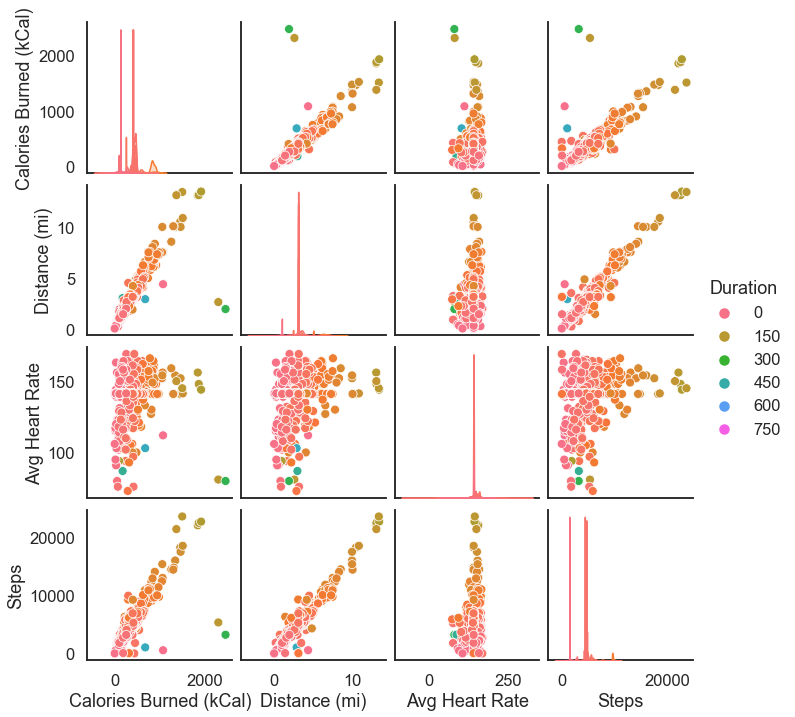

In [ ]:
sns.set_context('talk')
sns.set_style('white')
sns.pairplot(data[['Duration', 'Calories Burned (kCal)','Distance (mi)', 'Avg Heart Rate', 'Steps']], palette='husl', hue = 'Duration')

Text(0.5, 0, 'Distance in Miles')

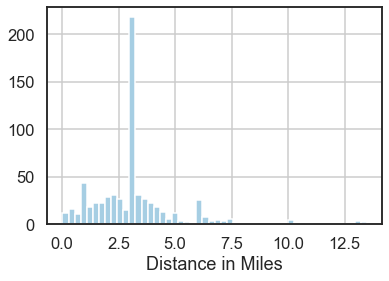

In [ ]:
data['Distance (mi)'].hist(bins = 50)
plt.xlabel('Distance in Miles')

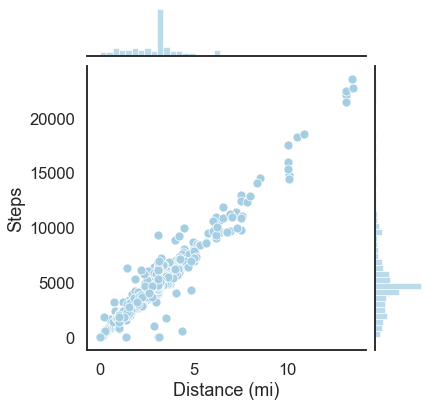

In [ ]:
sns.jointplot( x = 'Distance (mi)' , y = 'Steps', data = data)
#The above result looks far more realistic than the previous one.

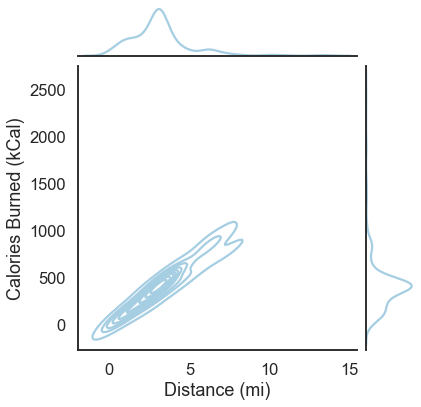

In [ ]:
sns.jointplot( x = 'Distance (mi)' , y = 'Calories Burned (kCal)', data = data ,kind ='kde')

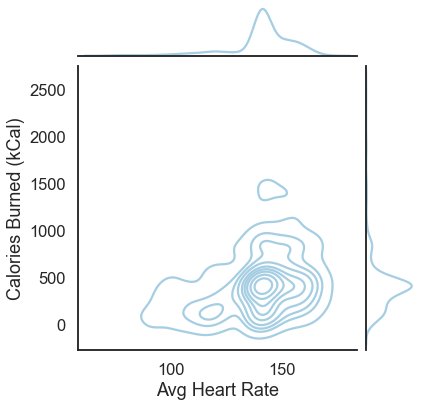

In [ ]:
sns.jointplot( x = 'Avg Heart Rate' , y = 'Calories Burned (kCal)', data = data ,kind ='kde')

## Part 2

As with the previous lesson, we need to ensure the data is scaled and (relatively) normally distributed.

*   Examine the correlation and skew.
*   Perform any transformations and scale data using your favorite scaling method.
*   View the pairwise correlation plots of the new data.


In [ ]:
corr_mat = data.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Duration
Calories Burned (kCal),0.000000,0.882720,0.513095,-0.028131,-0.080986,0.177674,0.136760,0.156028,0.852515,0.513095
Distance (mi),0.882720,0.000000,0.394288,-0.142467,-0.076519,0.287240,0.153952,0.284342,0.965025,0.394288
Workout Time (seconds),0.513095,0.394288,0.000000,0.706619,-0.027358,-0.283831,0.050284,-0.170022,0.332253,1.000000
Avg Pace (min/mi),-0.028131,-0.142467,0.706619,0.000000,0.018009,-0.600943,-0.049350,-0.375766,-0.154614,0.706619
Max Pace,-0.080986,-0.076519,-0.027358,0.018009,0.000000,-0.110021,-0.036585,-0.041774,-0.068975,-0.027358
Avg Speed (mi/h),0.177674,0.287240,-0.283831,-0.600943,-0.110021,0.000000,0.068953,0.556060,0.177338,-0.283831
Max Speed,0.136760,0.153952,0.050284,-0.049350,-0.036585,0.068953,0.000000,0.071628,0.166355,0.050284
Avg Heart Rate,0.156028,0.284342,-0.170022,-0.375766,-0.041774,0.556060,0.071628,0.000000,0.240933,-0.170022
Steps,0.852515,0.965025,0.332253,-0.154614,-0.068975,0.177338,0.166355,0.240933,0.000000,0.332253
Duration,0.513095,0.394288,1.000000,0.706619,-0.027358,-0.283831,0.050284,-0.170022,0.332253,0.000000


As before, the two categories with their respective most strongly correlated variable.


In [ ]:
corr_mat.abs().idxmax()

Calories Burned (kCal)             Distance (mi)
Distance (mi)                              Steps
Workout Time (seconds)                  Duration
Avg Pace (min/mi)         Workout Time (seconds)
Max Pace                        Avg Speed (mi/h)
Avg Speed (mi/h)               Avg Pace (min/mi)
Max Speed                                  Steps
Avg Heart Rate                  Avg Speed (mi/h)
Steps                              Distance (mi)
Duration                  Workout Time (seconds)
dtype: object

Examine the skew values and log transform. Looks like all of them need it.


In [ ]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

Max Pace                  20.881618
Workout Time (seconds)    11.486643
Duration                  11.486643
Max Speed                 11.214191
Avg Pace (min/mi)          9.543422
Calories Burned (kCal)     2.565448
Steps                      2.099829
Distance (mi)              1.845111
dtype: float64

In [ ]:
# The log transformations
for col in log_columns.index:
    data[col] = np.log1p(data[col])

Scale the data again. Let's use `MinMaxScaler` this time just to mix things up.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()

Visualize the relationship between the variables.


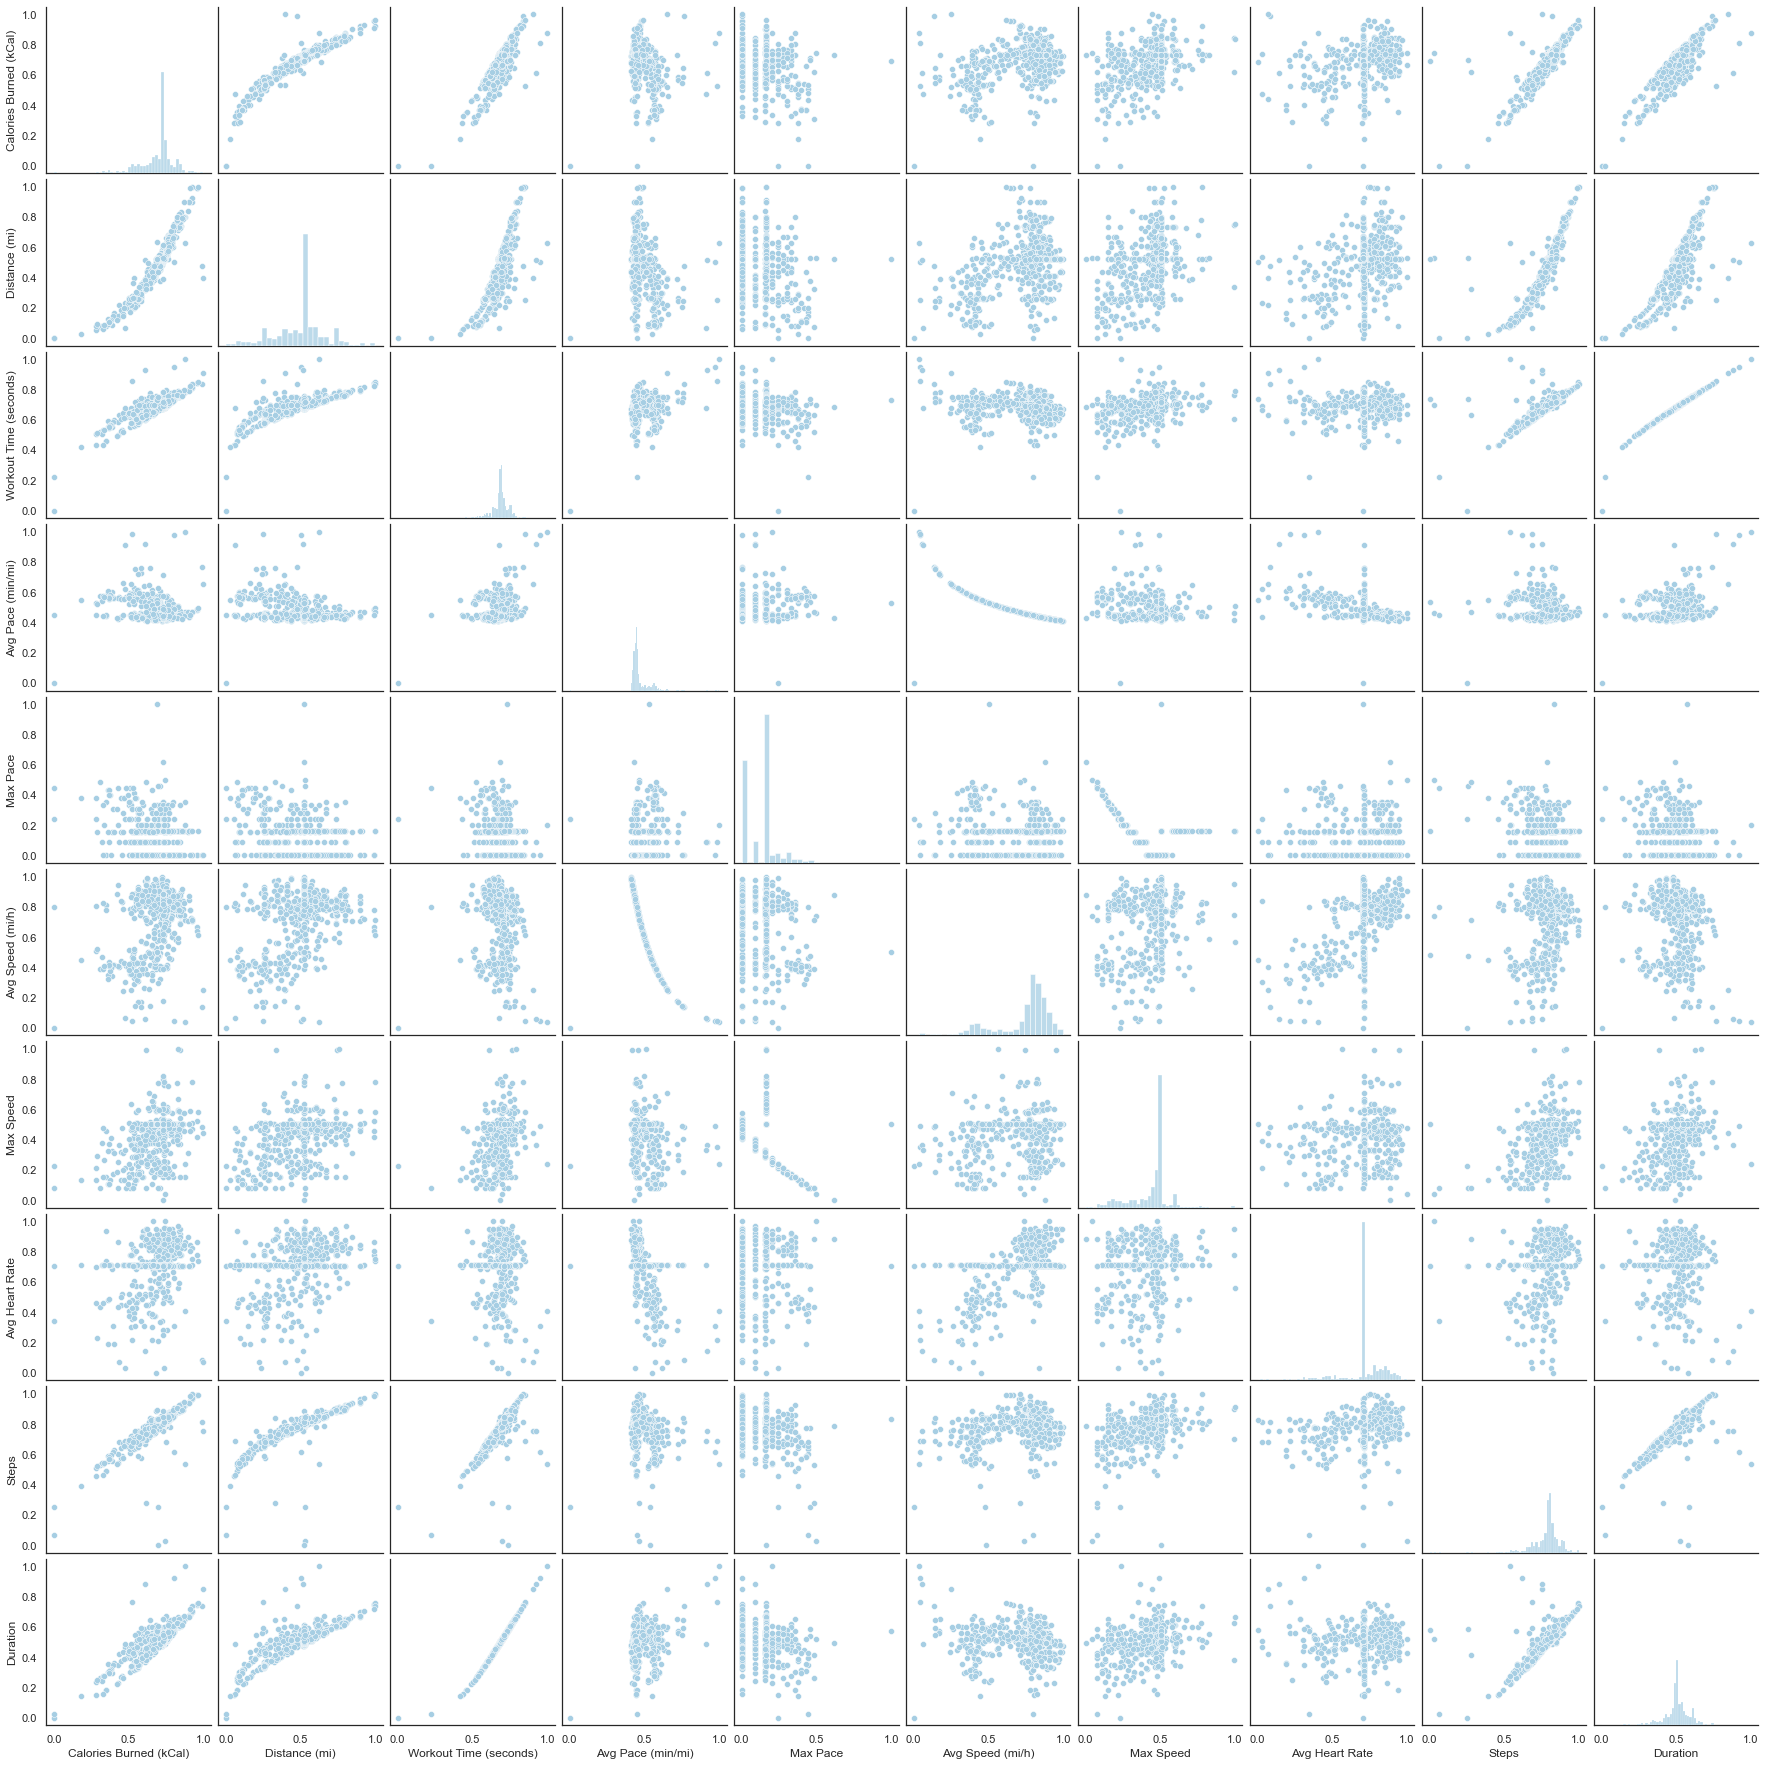

In [83]:
sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(data);

## Part 3

In this section, we will:

*   Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline. If you used a non-Scikit learn function to transform the data (e.g. NumPy's log function), checkout  the custom transformer class called [`FunctionTransformer`](http://scikit-learn.org/stable/modules/preprocessing.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#custom-transformers).
*   Use the pipeline to transform the original data that was stored at the end of question 1.
*   Compare the results to the original data to verify that everything worked.

*Note:* Scikit-learn has a more flexible `Pipeline` function and a shortcut version called `make_pipeline`. Either can be used. Also, if different transformations need to be performed on the data, a [`FeatureUnion`](http://scikit-learn.org/stable/modules/pipeline.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#featureunion-composite-feature-spaces) can be used.


In [84]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data_orig)

The results are identical. Note that machine learning models and grid searches can also be added to the pipeline (and in fact, usually are.)


In [85]:
np.allclose(data_pipe, data)
#note my dataset resulted in a false - meaning the log_transformer did not work

False

## Part 4

In this section, we will:

*   Perform PCA with `n_components` ranging from 1 to 5.
*   Store the amount of explained variance for each number of dimensions.
*   Also store the feature importance for each number of dimensions. *Hint:* PCA doesn't explicitly provide this after a model is fit, but the `components_` properties can be used to determine something that approximates importance. How you decided to do so is entirely up to you.
*   Plot the explained variance and feature importances.


In [86]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.483985
2,PCA(n_components=2),0.726378
3,PCA(n_components=3),0.840271
4,PCA(n_components=4),0.916916
5,PCA(n_components=5),0.961183


Create a table of feature importances for each data column.


In [87]:
feature_weight_list[1]

,n,features,values
0,2,Calories Burned (kCal),0.106002
1,2,Distance (mi),0.146227
2,2,Workout Time (seconds),0.070158
3,2,Avg Pace (min/mi),0.069995
4,2,Max Pace,0.038839
5,2,Avg Speed (mi/h),0.194503
6,2,Max Speed,0.067527
7,2,Avg Heart Rate,0.120050
8,2,Steps,0.085948
9,2,Duration,0.100750


In [88]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Avg Heart Rate,Avg Pace (min/mi),Avg Speed (mi/h),Calories Burned (kCal),Distance (mi),Duration,Max Pace,Max Speed,Steps,Workout Time (seconds)
n,,,,,,,,,,
1,0.106429,0.052118,0.167009,0.129274,0.184284,0.067220,0.050866,0.097535,0.096553,0.048713
2,0.120050,0.069995,0.194503,0.106002,0.146227,0.100750,0.038839,0.067527,0.085948,0.070158
3,0.115737,0.051841,0.143569,0.093592,0.136441,0.088827,0.103875,0.137500,0.066997,0.061621
4,0.176789,0.054607,0.160356,0.082091,0.117988,0.075952,0.114297,0.110558,0.055603,0.051760
5,0.163430,0.046680,0.147696,0.070734,0.102133,0.065438,0.157224,0.148221,0.052850,0.045595


Create a plot of explained variances.


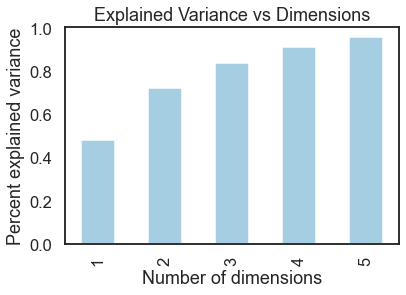

In [89]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

And here's a plot of feature importances.


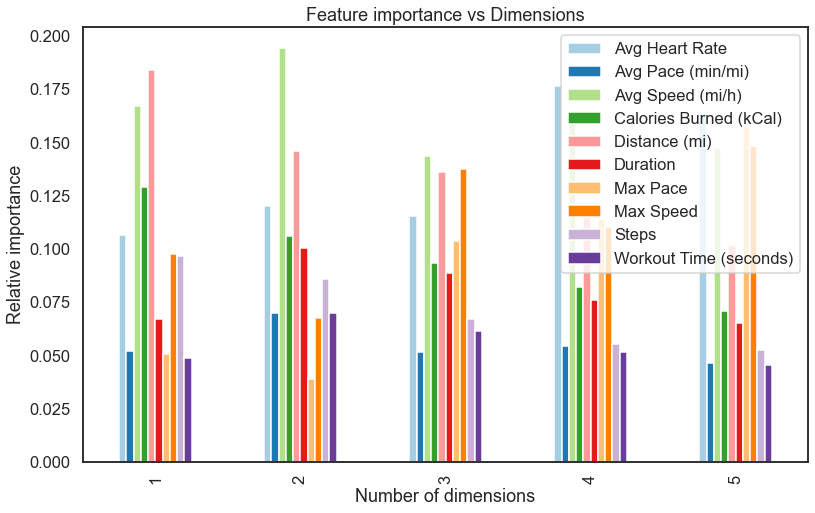

In [90]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');
plt.savefig('pca_dimensions.png')

## Part 5

In this section, we will:

*   Fit a `KernelPCA` model with `kernel='rbf'`. You can choose how many components and what values to use for the other parameters (`rbf` refers to a Radial Basis Function kernel, and the `gamma` parameter governs scaling of this kernel and typically ranges between 0 and 1). Several other [kernels](https://scikit-learn.org/stable/modules/metrics.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) can be tried, and even passed ss cross validation parameters (see this [example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)).
*   If you want to tinker some more, use `GridSearchCV` to tune the parameters of the `KernelPCA` model.

The second step is tricky since grid searches are generally used for supervised machine learning methods and rely on scoring metrics, such as accuracy, to determine the best model. However, a custom scoring function can be written for `GridSearchCV`, where larger is better for the outcome of the scoring function.

What would such a metric involve for PCA? What about percent of explained variance? Or perhaps the negative mean squared error on the data once it has been transformed and then inversely transformed?


In [113]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(data)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=4)

## Prediction Analysis

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [134]:
data['Duration'] = data['Workout Time (seconds)'] / 60
data['Duration'] = data['Duration'].astype(float)
data.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace', 'Avg Speed (mi/h)', 'Max Speed',
       'Avg Heart Rate', 'Steps', 'Duration'],
      dtype='object')

In [135]:
y_data = data['Duration']
data = data.drop('Duration', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=42)

lr = LinearRegression()
feature_dict = {'whole_dataset': list(X_train.columns),'best correlated feature':['Calories Burned (kCal)'],
'pca': PCA(n_components=10),
    'scaler': StandardScaler(),
    'estimator': lr}

for feat_choice in feature_dict.keys():
    feat_list = feature_dict[feat_choice]
    lr = lr.fit(X_train[feat_list], y_train)
    y_train_pred = lr.predict(X_train[feat_list])
    y_pred = lr.predict(X_test[feat_list])
    lr_score = r2_score(y_test.values, y_pred)
    print('R2 score for {}: {}'.format(feat_choice, lr_score))

R2 score for whole_dataset: 1.0
R2 score for best correlated feature: 0.5928927379057076


KeyError: PCA(n_components=10)

## Conclusion

Between the three models, the decision tree model gave the best accuracy score. It resulted in a 99% accuracy both times; whereas the other models ranged between the 60s and 80s

## Insights and Findings

The findings indicate that speed had the closest correlation to whether or not the run was going to be a 5k. The decision tree performed the best most likely due to the nature of the dataset, if the distance was x then y so on and so forth for the different variables.

## Recommendations

Recommendations would be to include additional data or further refine the dataset to see what other factors could possibly be influencing whether or not a 5k would be run. It would seem as though there should be more than just the speed that would determine if the run was going to be a 5k.